# Center of Mass

Our goal is to discuss the center of mass in discrete and continuous cases.  We will use the discrete examples to motivate the passage to the limit, and again see the interplay of summation and integration.

## The Lever




![](images/Lever.jpg)




> *"We are a perverse lot. Although Archimedes (287-212 B.c.) is acknowledged
as the greatest of the Greek mathematicians, it is customary not to
credit him with what he did do and to credit him with what he did not
do. His ingenious methods of computing areas and volumes brought
mathematics to the threshold of the integral calculus, yet the textbook
gives full credit for the calculus to Newton and Leibniz. He initiated the
science of mechanics by discovering the conditions of equilibrium of a
lever, yet it often is said that he discovered the lever itself-despite
Egyptian pyramid builders using levers thousands of years before he was
born."*--George Polya

Today, we will follow Polya and Archimedes to determine the law of the lever.  We will move this to the two dimensional case, and push this to uniform regions in the 2-Dimensional plane.  We will do all of this in symbols and with Python.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

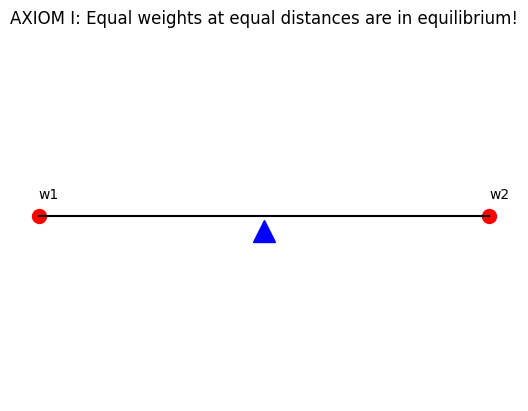

In [2]:
plt.plot(-1, 0, 'ro', markersize = 10)
plt.plot(1, 0, 'ro', markersize = 10)
plt.plot(0, -0.08, 'b^', markersize = 16)
plt.plot([-1, 1], [0, 0], color = 'black')
plt.ylim(-1, 1)
plt.axis('off')
plt.text(-1, 0.1, 'w1')
plt.text(1, 0.1, 'w2')
plt.title('AXIOM I: Equal weights at equal distances are in equilibrium!');

### The Path

**Axiom I**: Equal weights at equal distances are in equilibrium.

![](images/ax1.png)

**Axiom II**: $W$ at each end $\cong 2W$ in middle.

![](images/ax2.png)

### Generalizing

![](images/ax2b.png)
![](images/ax2c.png)
![](images/ax2d.png)

Thus, we propose that:

$$weight \times distance = weight \times distance$$

These values determined by *weight $\times$ distance* are called **moments**.  A SeeSaw full of robots will be in equilibrium, or balanced, when the moments to the left of the fulcrum are equal to the moments to the right.

### Solving A 1-D Problem two ways

Suppose we have three masses distributed on a lever, as shown in the image below:

![](images/masses1.png)


Here, the center of mass is determined by the following definition:

$$\bar{x} = \frac{\sum m_n x_n}{\sum m_n}$$

For example, we can choose masses 1, 3, and 2 located at distances 1, 3, and 7 from the left end of the lever respectively.  Using the definition, we have

$$\bar{x} = \frac{M_x}{M} \rightarrow \frac{1*1 + 3*3 + 2*7}{1+3+2} ~\text{or} ~4$$

We should be able to work in reverse from the picture and distribute weights evenly as we had done with Archimedes as a method to check.

### 2-D Case: Discrete Point Masses

The formulas might be what we expect, however, we should note the presence of the $M_y$ in the $x$-coordinate and the $M_x$ in the $y$-coordinate.


$$\bar{x} = \frac{M_y}{M}= \frac{\sum m_nx_n}{\sum m_n} \quad \bar{y} = \frac{M_x}{M} = \frac{\sum m_ny_n}{\sum m_n}$$

Thus, if we have masses 1 and 4 located at points $(1,0)$ and $(0,1)$ respectively, we have a center of mass at

$$\bar{x} = \frac{1*1 + 4*0}{1 + 4} \quad \bar{y} = \frac{1*0 + 4*1}{1+4}$$

$$\bar{x} = \frac{1}{5} \quad \bar{y}= \frac{4}{5}$$



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd

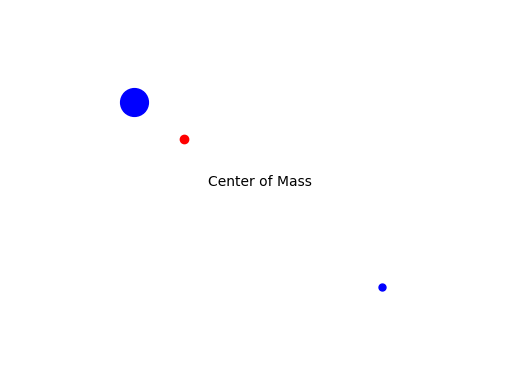

In [4]:
plt.plot(0, 1, 'o', color = 'blue', markersize = 20)
plt.plot(1,0, 'o', color = 'blue', markersize = 5)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.plot(0.2, 0.8, 'o', color = 'red')
plt.axis('off')
plt.text(.3, 0.55, 'Center of Mass');

### An Example From Data

**CLUSTERING**: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).



In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y, centers = make_blobs(random_state = 42, center_box = (0, 10), return_centers=True)

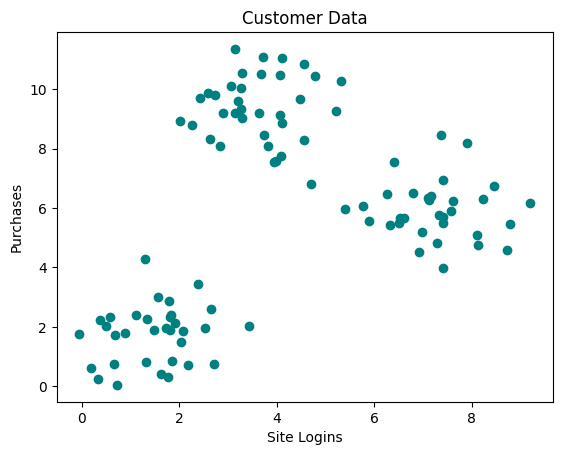

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = 'teal');
plt.xlabel('Site Logins')
plt.ylabel('Purchases')
plt.title('Customer Data');

**KMeans Algorithm**

```
- Determine how many groups we believe exist
- Create initial centers guess
- Measure inner group variation from each point to these centers
- Assign points to minimum variance cluster center
- Use these clusters to find new center of mass
- Repeat until converge
```

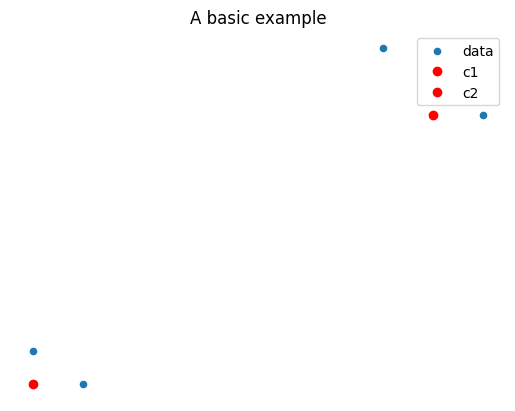

In [8]:
df = pd.DataFrame({'x1': [1, 2, 8, 10], 'x2': [2, 1, 11, 9]})
df.plot('x1', 'x2', kind = 'scatter', label = 'data')
plt.plot(1, 1, 'ro', label = 'c1')
plt.plot(9, 9, 'ro', label = 'c2')
plt.legend();
plt.title('A basic example')
plt.axis('off');

In [9]:
#find the distances
dists = {}
dists['variance from center 1']=np.apply_along_axis(np.linalg.norm, 
                                1, 
                                df.values - np.array([[1, 1]]))**2
dists['variance from center 2']= np.apply_along_axis(np.linalg.norm, 
                                 1, 
                                 df.values - np.array([[9, 9]]))**2

In [10]:
#which is less?
pd.DataFrame(dists)

,variance from center 1,variance from center 2
0,1.0,113.0
1,1.0,113.0
2,149.0,5.0
3,145.0,1.0


In [11]:
#update our centers
df

,x1,x2
0,1,2
1,2,1
2,8,11
3,10,9


In [12]:
#bigger example
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.cluster_centers_

array([[1.48810398, 1.7638381 ],
       [3.58679489, 9.42861763],
       [7.17957059, 5.95233528]])

In [14]:
kmeans.cluster_centers_[0]

array([1.48810398, 1.7638381 ])

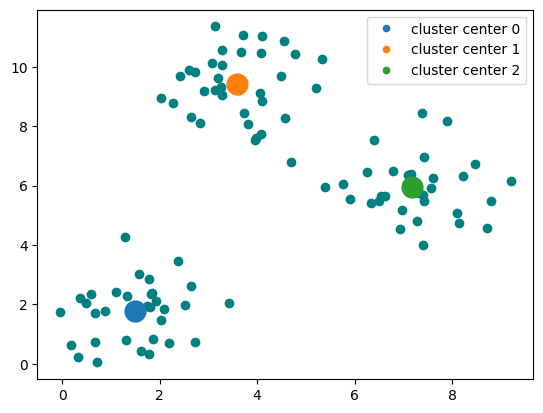

In [15]:
plt.scatter(X[:, 0], X[:, 1], color = 'teal')
for i in range(3):
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', markersize = 15, label = f'cluster center {i}')
plt.legend(markerscale = 0.3);

### Center of Mass Problems

1. Two cats, one weighing 30 grams and the second weighing 90 would like to use a see saw.  Where should we place the fulcrum?
2. Three monkeys are located at points (3, 5), (2, 0), and (6, 6) respectively (same weights).  Where is their center of mass?
 


### Riemann Sums

In mathematics, a Riemann sum is a certain kind of approximation of an integral by a finite sum. It is named after nineteenth century German mathematician Bernhard Riemann. One very common application is approximating the area of functions or lines on a graph, but also the length of curves and other approximations. -- [Source](https://en.wikipedia.org/wiki/Riemann_sum)

Consider, for example, the function:

$$f(x) = -x^2 + 1 \quad \text{on} \quad [-1, 1]$$

In [16]:
#define function and domain
def f(x): return -x**2 + 1
x = np.linspace(-1, 1, 1000)

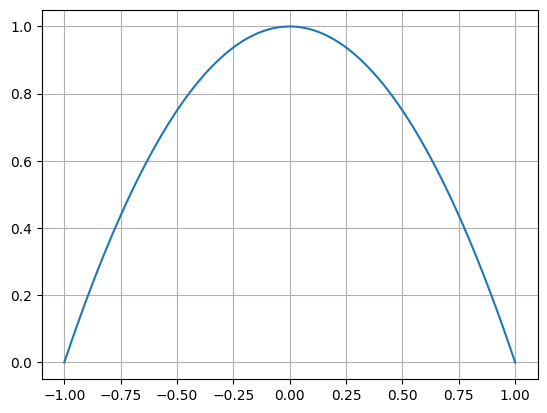

In [17]:
#plot it
plt.plot(x, f(x))
plt.grid();

-----
- If we want to approximate the area under this curve with 4 equally spaced rectangles, what would their width be?
- same as above, but 8 equally spaced rectangles?
- Width for 20 equally spaced rectangles?
- Width for $n$ equally spaced rectangles.
-----


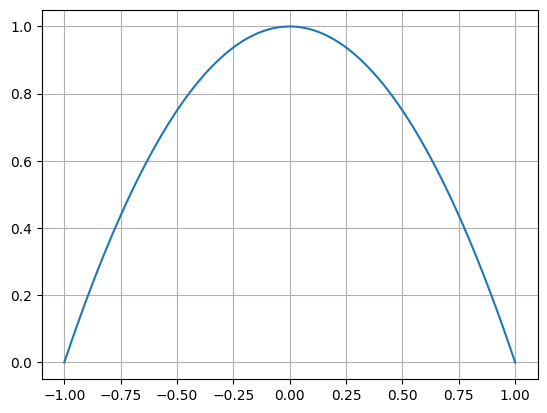

In [18]:
plt.plot(x, f(x))
plt.grid();

-----
- Build 4 equally spaced rectangles in the image above -- where should we draw their heights?
- Draw the 4 rectangles at the left endpoint of each subinterval,
the right, and the midpoint
-----

**PROBLEM**

Consider the function drawn below.  

![](images/riemann_approx.png)

**GOAL**: Expression to sum area of rectangles that depends on function and $a, b$ and the number of rectangles $n$.  

- Write expressions for $x_1, x_2, x_3, x_4$ in terms of $a,b$. 
- What are the heights of the four rectangles?
- Write expressions for the heights of the rectangles?
- Multiply widths times heights for a general expression of your area.
- Generalize your work above for $L(n)$, where any interval $[a, b]$ is partioned into $n$ subintervals, and the left hand side of the interval determines the heights of the rectangles. 


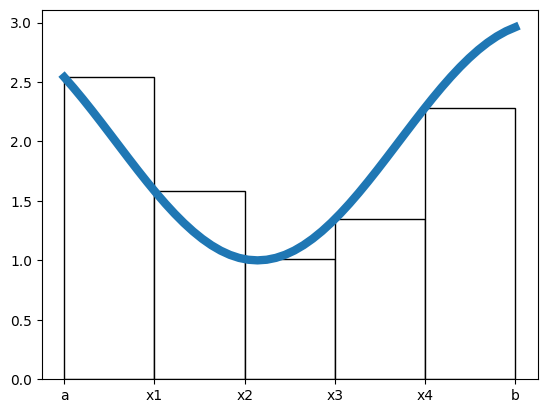

In [19]:
def f(x): return 2 + np.cos(x)
x = np.linspace(1, 6)
plt.plot(x, f(x), linewidth = 6)
plt.bar(range(1, 6), f(range(1, 6)), width = 1, color = 'white',
       edgecolor = 'black', align = 'edge')
plt.xticks(range(1, 7), ['a', 'x1', 'x2', 'x3', 'x4', 'b']);
plt.savefig('images/riemann_approx.png')